In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/andersen/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#every row of the table is a data sample (feature vector) from a person
df = pd.read_csv('cs_data.csv')
df.head()

,id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### handle nan (null) in data (i.e. missing values)
Some fields in the table are nan, which are missing values. <br>
For example, someone may not want to reveal monthly income to whoever made the table/survey, then the table got nan.

In [3]:
df.isnull().sum()

id                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [4]:
#here, we use a simple method:
#replace nan in each column with median value of that column
#there are other methods in pandas and sklearn: interpolation in pandas and KNNImputer in sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
dfv=imputer.fit_transform(df.values)
df=pd.DataFrame(data=dfv, columns=df.columns)
df.isnull().sum()

id                                      0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### We have a highly imbalanced dataset
139974 data samples in class-0 (normal) <br>
10026 data samples in class-1 (financial distress)

<AxesSubplot:>

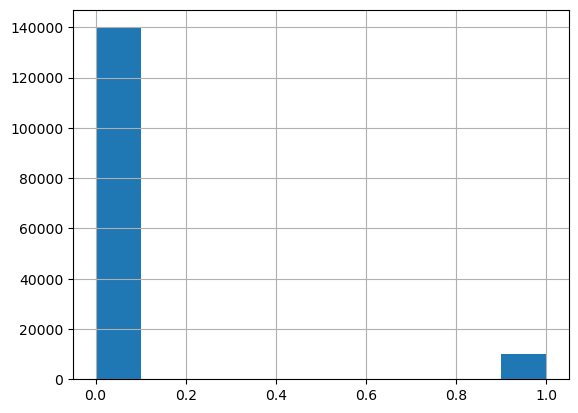

In [5]:
df['SeriousDlqin2yrs'].hist()

In [6]:
(df['SeriousDlqin2yrs']==0).sum()

139974

In [7]:
(df['SeriousDlqin2yrs']==1).sum()

10026

#### Classification Goal: predict 'SeriousDlqin2yrs' (Y) using the other features (X)

In [8]:
X=df.drop(['SeriousDlqin2yrs', 'id'], axis=1)
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [9]:
#Y is the target/class label
Y=df['SeriousDlqin2yrs']
Y.head()

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: SeriousDlqin2yrs, dtype: float64

In [10]:
# convert pandas dataframe/series to numpy array
# sklearn functions may not work well with pandas data types
X=X.values
Y=Y.values

We split the data into training, validation and testing sets

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#split X_train and Y_train into a 'pure' training set and a validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
print('train:', X_train.shape, Y_train.shape)
print('validation:', X_val.shape, Y_val.shape)
print('test:', X_test.shape, Y_test.shape)

train: (108000, 10) (108000,)
validation: (12000, 10) (12000,)
test: (30000, 10) (30000,)


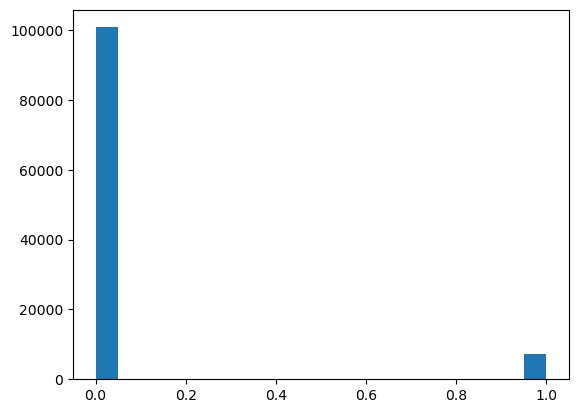

In [12]:
plt.hist(Y_train, bins=20);

In [13]:
(Y_train==0).sum()

100824

In [14]:
(Y_train==1).sum()

7176

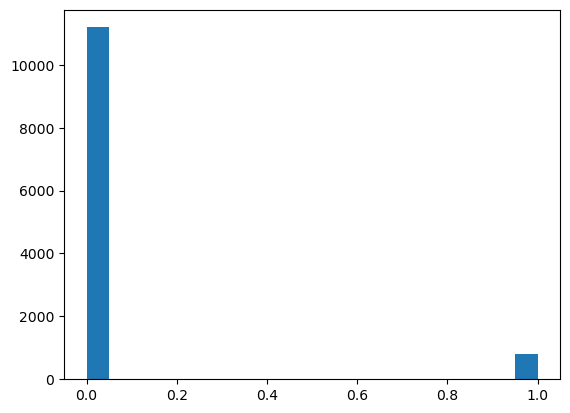

In [15]:
plt.hist(Y_val, bins=20);

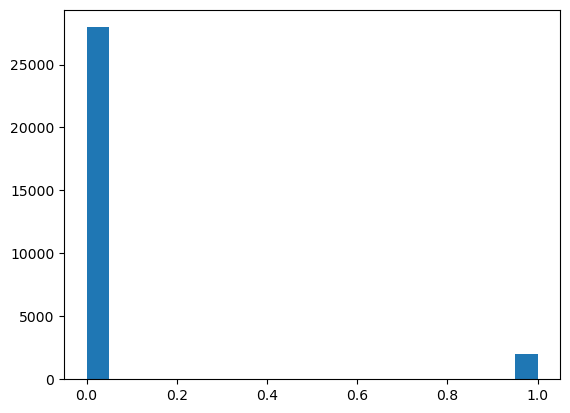

In [16]:
plt.hist(Y_test, bins=20);

In [17]:
def weighted_accuracy(confusion):
    #input: confusion is the confusion matrix
    #output: acc is the weighted classification accuracy
    M=confusion.copy().astype('float32')
    for k in range(0, M.shape[0]):
        M[k]/=M[k].sum()+1e-8    
    acc = M.diagonal().sum()/M.sum()
    return acc

In [18]:
#apply feature normalization to training, validation and test sets
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train) 
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

#### build a LogisticRegression classifier as the baseline model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR=LogisticRegression(penalty='none', class_weight='balanced', solver='newton-cg', random_state=0)
LR.fit(X_train, Y_train)
Y_val_pred=LR.predict(X_val)
confusion_val=confusion_matrix(Y_val, Y_val_pred)
acc_val=weighted_accuracy(confusion_val)
Y_test_pred=LR.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)
acc_test=weighted_accuracy(confusion_test)
print('classification accuracy on validation set is ', acc_val)
print('classification accuracy on test set is ', acc_test)

classification accuracy on validation set is  0.7163831
classification accuracy on test set is  0.7099812


## Your task begins here

#### Let's try DecisionTreeClassifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier with the specified parameters
DT = DecisionTreeClassifier(class_weight='balanced', max_depth=20, random_state=0)

# Fit the classifier to the training data
DT.fit(X_train, Y_train)

# Predict on the validation set
Y_val_pred = DT.predict(X_val)
confusion_val = confusion_matrix(Y_val, Y_val_pred)
acc_val = weighted_accuracy(confusion_val)

# Predict on the test set
Y_test_pred = DT.predict(X_test)
confusion_test = confusion_matrix(Y_test, Y_test_pred)
acc_test = weighted_accuracy(confusion_test)

# Print out the classification accuracies

print('classification accuracy on validation set is ', acc_val)
print('classification accuracy on test set is ', acc_test)

classification accuracy on validation set is  0.67388946
classification accuracy on test set is  0.66793966


#### Let's try randomforest

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier with the specified parameters
RF = RandomForestClassifier(n_estimators=20, class_weight='balanced', max_depth=20, random_state=0)

# Fit the classifier to the training data
RF.fit(X_train, Y_train)

# Predict on the validation set
Y_val_pred = RF.predict(X_val)
confusion_val = confusion_matrix(Y_val, Y_val_pred)
acc_val = weighted_accuracy(confusion_val)

# Predict on the test set
Y_test_pred = RF.predict(X_test)
confusion_test = confusion_matrix(Y_test, Y_test_pred)
acc_test = weighted_accuracy(confusion_test)
print('classification accuracy on validation set is ', acc_val)
print('classification accuracy on test set is ', acc_test)

classification accuracy on validation set is  0.64186645
classification accuracy on test set is  0.6335782


## Model Selection (hyper-parameter optimization) 
Clearly, max_depth=20 is not optimal for DecisionTreeClassifier and RandomForestClassifier <br>
You will do a grid search to find the best max_depth. <br>

### 1. find the best max_depth in DecisionTreeClassifier

In [22]:
max_depth_list = np.arange(1, 20, 1)
max_depth_list


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [23]:
acc_train_list=[]
acc_val_list=[]
for d in max_depth_list:
    DTC = DecisionTreeClassifier(class_weight='balanced', max_depth=d, random_state=0)
    DTC.fit(X_train,Y_train)
    Y_val_pred = DTC.predict(X_val)
    confusion_val=confusion_matrix(Y_val, Y_val_pred)
    acc_val=weighted_accuracy(confusion_val)
    Y_train_pred=DTC.predict(X_train)
    confusion_train=confusion_matrix(Y_train, Y_train_pred)
    acc_train=weighted_accuracy(confusion_train)
    acc_val_list.append(acc_val)
    acc_train_list.append(acc_train)
acc_train_list
acc_val_list

[0.65460956,
 0.7337307,
 0.7509314,
 0.7509314,
 0.75495356,
 0.7536156,
 0.75441754,
 0.7538059,
 0.7580826,
 0.75636005,
 0.7519279,
 0.74839675,
 0.7400179,
 0.73465526,
 0.7214458,
 0.71311927,
 0.7065429,
 0.6897093,
 0.6826336]

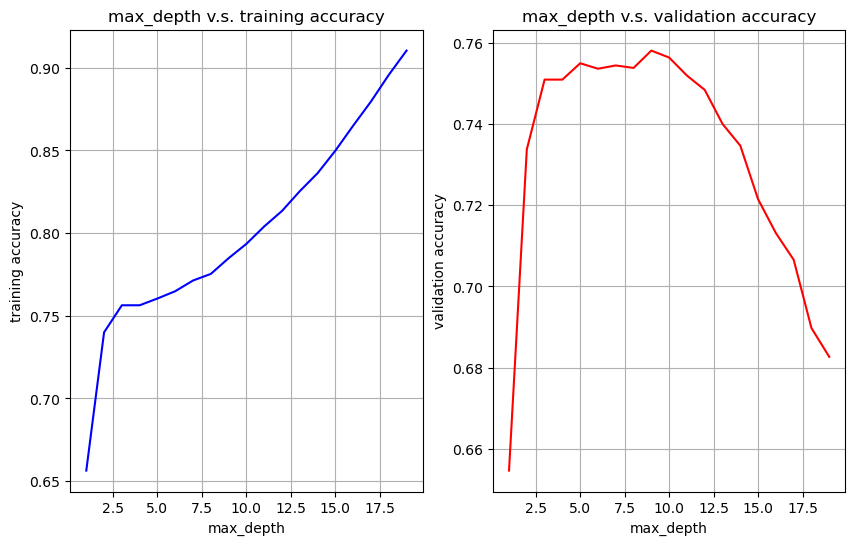

In [24]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(max_depth_list, acc_train_list, 'b')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('training accuracy')
ax[0].set_title('max_depth v.s. training accuracy')
ax[0].grid(True)
ax[1].plot(max_depth_list, acc_val_list, 'r')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('validation accuracy')
ax[1].set_title('max_depth v.s. validation accuracy')
ax[1].grid(True)

From the above figure, we see that training accuracy keeps increasing as max_depth increases. <br>
Validation accuracy reveals the ability of the model predicting y on new data samples that the model did not see during training. <br>
This is why we use validation accuracy curve to find the best hyper-parameter

In [25]:
max_depth_best = np.argmax(acc_val_list)
max_depth_best

8

In [26]:
DTC = DecisionTreeClassifier(class_weight='balanced', max_depth=max_depth_best, random_state=0)
DTC.fit(X_train,Y_train)
Y_test_pred = DTC.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)
acc_test=weighted_accuracy(confusion_val)
acc_test

0.6826336

In [27]:
confusion_test

array([[23253,  4704],
       [  706,  1337]])

### 2. find the best max_depth in RandomForestClassifier

In [28]:
max_depth_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [29]:
acc_train_list=[]
acc_val_list=[]
for d in max_depth_list:
    print(d)
    RFC = RandomForestClassifier(class_weight='balanced', max_depth=d, random_state=0)
    RFC.fit(X_train,Y_train)
    Y_val_pred = RFC.predict(X_val)
    confusion_val=confusion_matrix(Y_val, Y_val_pred)
    acc_val=weighted_accuracy(confusion_val)
    Y_train_pred=RFC.predict(X_train)
    confusion_train=confusion_matrix(Y_train, Y_train_pred)
    acc_train=weighted_accuracy(confusion_train)
    acc_val_list.append(acc_val)
    acc_train_list.append(acc_train)
acc_train_list
acc_val_list

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


[0.7481636,
 0.7509314,
 0.7509314,
 0.753738,
 0.7555462,
 0.757904,
 0.7596908,
 0.76463187,
 0.7590342,
 0.76155317,
 0.75808996,
 0.7506801,
 0.73798347,
 0.7309524,
 0.7082201,
 0.6986719,
 0.68964225,
 0.67074984,
 0.66340023]

In [30]:
ax[0].plot(max_depth_list, acc_train_list, 'b')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('training accuracy')
ax[0].set_title('max_depth v.s. training accuracy')
ax[0].set_xlim(0,20)
ax[0].grid(True)
ax[1].plot(max_depth_list, acc_val_list, 'r')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('validation accuracy')
ax[1].set_title('max_depth v.s. validation accuracy')
ax[1].set_xlim(0,20)
ax[1].grid(True)

In [31]:
max_depth_best = np.argmax(acc_val_list)
max_depth_best

7

In [32]:
RFC = RandomForestClassifier(class_weight='balanced', max_depth=max_depth_best, random_state=0)
RFC.fit(X_train,Y_train)
Y_test_pred = RFC.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)
acc_test=weighted_accuracy(confusion_val)
acc_test

0.66340023

In [33]:
confusion_test

array([[23467,  4490],
       [  682,  1361]])

## KNeighborsClassifier and upsampling
We need to find the best hyper-parameter n_neighbors in KNeighborsClassifier <br>
There is no 'class_weight' parameter in KNeighborsClassifier, so we have to do upsampling to handle imbalanced data

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,Y_train)
Y_test_pred = knn.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)
acc_test=weighted_accuracy(confusion_val)
print('classification accuracy on the testing set is ', acc_test)

classification accuracy on the testing set is  0.66340023


In [35]:
from sklearn.utils import resample
X_train_c0 = X_train[Y_train == 0]
X_train_c1 = X_train[Y_train == 1]
X_train_c1_resampled = resample(X_train_c1, n_samples=len(X_train_c0), random_state=42)
X_train_new = np.concatenate([X_train_c0, X_train_c1_resampled])
Y_train_new = np.concatenate([np.zeros(len(X_train_c0)), np.ones(len(X_train_c1_resampled))])

In [36]:
n_neighbors_list = []
rangee = 10
for i in range(rangee):
    n_neighbors_list.append(1 + (11*i))
n_neighbors_list

[1, 12, 23, 34, 45, 56, 67, 78, 89, 100]

In [37]:
acc_train_list=[]
acc_val_list=[]
def weighted_accuracy(confusion):
    #input: confusion is the confusion matrix
    #output: acc is the weighted classification accuracy
    M=confusion.copy().astype('float32')
    for k in range(0, M.shape[0]):
        M[k]/=M[k].sum()+1e-8    
    acc = M.diagonal().sum()/M.sum()
    return acc

# Loop through each value of n_neighbors
for n_neighbors in n_neighbors_list:
    # Initialize the KNeighborsClassifier with the current number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Fit the model on the new, balanced training data
    knn.fit(X_train_new, Y_train_new)

    # Predict and evaluate on the training set
    Y_train_pred = knn.predict(X_train_new)
    confusion_train = confusion_matrix(Y_train_new, Y_train_pred)
    acc_train = weighted_accuracy(confusion_train)
    acc_train_list.append(acc_train)

    # Predict and evaluate on the validation set
    Y_val_pred = knn.predict(X_val)
    confusion_val = confusion_matrix(Y_val, Y_val_pred)
    acc_val = weighted_accuracy(confusion_val)
    acc_val_list.append(acc_val)

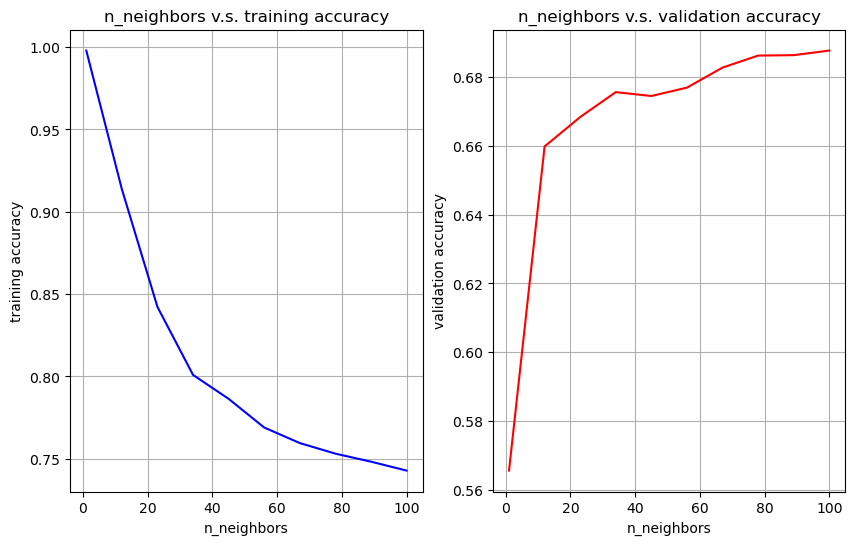

In [38]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(n_neighbors_list, acc_train_list, 'b')
ax[0].set_xlabel('n_neighbors')
ax[0].set_ylabel('training accuracy')
ax[0].set_title('n_neighbors v.s. training accuracy')
ax[0].grid(True)
ax[1].plot(n_neighbors_list, acc_val_list, 'r')
ax[1].set_xlabel('n_neighbors')
ax[1].set_ylabel('validation accuracy')
ax[1].set_title('n_neighbors v.s. validation accuracy')
ax[1].grid(True)

The trainig accuracy of KNN keeps decreasing as n_neighbors increases. <br>
The validation accuracy of KNN keeps increasing as n_neighbors increases. <br>
To determine the optimal n_neighbors, we may need to consider validation accuracy and model complexity: <br>
select a small n_neighbors with high validation accuracy <br>
We could use the "upside-down" elbow method: <br>
starting from the best n_neighbors, the validation accuracy curve starts to become flat.

In [39]:
n_neighbors_best = np.argmax(acc_val_list)
n_neighbors_best

9

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
knn_best = KNeighborsClassifier(n_neighbors=n_neighbors_best)
knn_best.fit(X_train_new, Y_train_new)
Y_test_pred = knn_best.predict(X_test)
confusion_test = confusion_matrix(Y_test, Y_test_pred)
acc_test = weighted_accuracy(confusion_test)
print(f'Classification accuracy on the testing set is: {acc_test}')

Classification accuracy on the testing set is: 0.6532451510429382
